# truncate 이란? 

pad_sequence 안에 있는 파라미터로, maxlen 보다 더 긴 문장이 들어왔을대 해당 문장은 maxlen 에 맞춰서 자를 때와 관련이 있다. 

pre-padding , post-padding 이랑 마찬가지로, truncating= 'pre' 이면 앞에 서 부터 잘라나가고, trauncating ='post' 이면 뒤에서부터 단어가 잘려 나간다고 한다. 

In [2]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

2.5.0


2021-08-05 22:37:39.328725: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /Users/hhi/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


2021-08-05 22:40:20.652846: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import numpy as np
train_data, test_data = imdb['train'], imdb['test']
#test, train data 를 나눈다. 

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

#이제 sentnece 와 label 을 extract 하려고 한다. s, l 은 tensor 라고 한다. 그래서 numpy method 를 통해서 
# 부르게 되면, 실제로 sentence 값과 label 값을 넣을 수 있게 한다고 한다. 

for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(str(l.numpy()))

# 이후 코드 

이후 코드에서도 뭔가 있다. 정확하게 무슨 말을 하는지는 모르겠는데,,, 0 은 negative value 를 의미하고, 

1 은 positive value 를 의미한다고 한다. 

s,l 로 인해서 내 코드는 training 할때 label 을 numpy array 를 기대하고 있을 것이다. 

그래서 이제 label 들을 numpy array 로 사용하도록 할 것이라고 한다. 

### tokenizer.fit_on_texts(training_sentences)

를 통해서 training_sentencEs 들에 대해서 encoding 을 실행 시킨다. 

### sequences = tokenizer.texts_to_sequences(training_sentences)

이제 단어 대신에 list 에는 token 화 된 value 들이 들어가게 되는 것이다. 그리고 그 리스트 이름을 sequence 로 만든다는 것이다. 

### padded = pad_sequences(sequences, maxlen= max_length, truncating = trunc_type)

이제 sequence 라는 list 안에는 길이가 각기 다른 문장들이 있을 것이다. 이제 이것을 pading 을 통해서 길이를 다 맞추는 작업을 하게 되는 것이다. 


pad_sequence 안에 있는 파라미터로, maxlen 보다 더 긴 문장이 들어왔을대 해당 문장은 maxlen 에 맞춰서 자를 때와 관련이 있다. 

pre-padding , post-padding 이랑 마찬가지로, truncating= 'pre' 이면 앞에 서 부터 잘라나가고, trauncating ='post' 이면 뒤에서부터 단어가 잘려 나간다고 한다. 

### testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

testing_sentences 들에게도 동일한 작업을 치게 되는 것이다.

여기서 주의 해야되는 점은, training_set 으로부터 word index 가 발생한 것이기 때문에, testing_sentence 안에 는 Out of Vocab 이 많이 뜰 것이다. 


### testing_padded = pad_sequences(testing_sequences, maxlen= max_length)

전고 ㅏ동일하게 , padding 을 진행하게 되는 것이다. 


**아니 근데, testing_sentences 에서는.. tokenizing 을 안하는 것인가? 지금 설명에서는 그런 코드가 없어서 내가 모르고 있는 것인가? 잘 모르겠음... **

## Neural network 에 이제 돌릴 것이다. 

## 여기에서 특별하게 볼 수 있는 것은 embedding 이다. 

### tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length
 
앞서서 hyper parameter 를 다 설정했었음.. 

여기서부터가 진짜 뭔가가 일어나는 곳이라고 한다. 

# 이상하게 무슨 vector 얘기가 나오고, 16 dimension 에 대해서 얘기가 나오고 있다... 

한문장안에 단어들이 있으면, 보통 비슷한 의미를 갖고 있는 단어들은 근처에 있다고 한다. 

그래서 엄청 높은 차원의 공간에서 이것들 갖고 장난질을 시작한다고 생각하면 되는 거 같다. 

그렇게 되면 시간이 지나면 지날수록, 비슷한 의미를 갖고 있는 것들은 clustering 이 자동적으로 될 것이라고 한다. 

## embedding 을 한 다음에 

그 다음에는 이미지랑 마찬기지로 flatten 을 진행해야된다고 한다. 왜지 ? -> dimension 이 16 이라서! 

그리고 나서는 Dense 에 들어가게 되는 것이다. 

### flatten 대신에 GlobalAveragePooling1D() 라는 것을 사용할 수 잇따 .

이렇게 되면 좀더 simple 하게 된다고 한다. 

flatten 을 쓰는 것이랑, globalAveragePooling1D 를 사용할때랑 장단점이 있다고 한다. 그러기 때문에 둘다 한번 해보라고 했었음 

## embedding

model.layers[0] 이라는 것은, embedding layer 의 결과물을 볼수 있는 것이다. 

weight.shape = 10000,16 => 10000 개의 단어가 존재하고 잇는 것이고, 16 차원에서 놀고 있는 것임을 알려주고 있는 것이다.


### reverse_word_index

그냥 word, index 의 표현 방식을 변형한다는 것이다. 

**그리고 나서는 그냥 3D 로 뭔가를 보는 것을 하고 잇음. 아니 근데 이게 뭔가 ML 할때 관련이 있는 것인가? 우리가 대회를 하는데 이것들이 필요가 있는 것인가? 글쎄다..** 

In [6]:
import tensorflow as tf
print(tf.__version__)

# !pip install -q tensorflow-datasets

2.5.0


In [7]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


In [8]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [9]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)


In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 11526     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 2s 2ms/step - loss: 0.4972 - accuracy: 0.7400 - val_loss: 0.3424 - val_accuracy: 0.8508
Epoch 2/10
782/782 [==============================] - 2s 2ms/step - loss: 0.2365 - accuracy: 0.9086 - val_loss: 0.3687 - val_accuracy: 0.8396
Epoch 3/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0855 - accuracy: 0.9791 - val_loss: 0.4561 - val_accuracy: 0.8277
Epoch 4/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0214 - accuracy: 0.9974 - val_loss: 0.5501 - val_accuracy: 0.8243
Epoch 5/10
782/782 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.5981 - val_accuracy: 0.8270
Epoch 6/10
782/782 [==============================] - 2s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6442 - val_accuracy: 0.8296
Epoch 7/10
782/782 [==============================] - 2s 2ms/step - loss: 8.3394e-04 - accuracy: 1.0000 - val_loss: 0.7050 - val_accuracy: 0.8268
Ep

In [13]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [14]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [15]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [16]:
sentence = "I really think this is amazing. honest."
sequence = tokenizer.texts_to_sequences([sentence])
print(sequence)

[[11, 64, 102, 12, 7, 478, 1200]]


# Sarcasm DATASET!!!! 


돌려보면, loss_value 가 training_loss 는 점점 낮아 지게 된다. 이건 굉장히 좋은 사인인거지? 그치? 

그러나 , validation_loss 는 점점 증가 하는 것을 볼 수 있게 된다. 이건 왜 이렇게 되는 것인지 알아봅세! 

여기에서는 confidence per prediction 이 점점 줄어들었다! 라고 표현을 한다. 아니 왜 이렇게 표현하는거지 ? 

구글링 해보면 이런단어는 안나오는데... 내 생각에는 loss 를 이렇게 표현한 것이라고 생각이 드는데.. 정확하게는 무슨 말인지 모르겠다. 

### confidence per prediction 이란? 

여아튼간에 **TEXT** data 에서는 이런 현상을 많이 볼 수 있다고 한다.

이런것의 변화를 정확하게 알기 위해서는 hyper-parameter 를 조정하면서 볼 수 있다고 한다. 

vovab_size, maxlength 를 조절하게 되면, training에 가해지는 Impact 를 잘 알수 있다고 한다. 

LOSS function 이 늘어나지 않은 상태로 accuracy 가 증가하는지 안하는지 확인을 꼭 해보라고 한다. 


In [19]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [20]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [22]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2021-08-06 05:02:55--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.80, 34.64.4.16, 34.64.4.112
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: `/tmp/sarcasm.json'

/tmp/sarcasm.json   100%[===================>]   5.38M  2.19MB/s    in 2.5s    

2021-08-06 05:02:59 (2.19 MB/s) - `/tmp/sarcasm.json' saved [5643545/5643545]



In [23]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [24]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [25]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [26]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
625/625 - 1s - loss: 0.6744 - accuracy: 0.5654 - val_loss: 0.6240 - val_accuracy: 0.6645
Epoch 2/30
625/625 - 1s - loss: 0.4562 - accuracy: 0.8160 - val_loss: 0.3897 - val_accuracy: 0.8302
Epoch 3/30
625/625 - 1s - loss: 0.3149 - accuracy: 0.8724 - val_loss: 0.3527 - val_accuracy: 0.8526
Epoch 4/30
625/625 - 1s - loss: 0.2615 - accuracy: 0.8974 - val_loss: 0.3602 - val_accuracy: 0.8387
Epoch 5/30
625/625 - 1s - loss: 0.2264 - accuracy: 0.9107 - val_loss: 0.3464 - val_accuracy: 0.8508
Epoch 6/30
625/625 - 1s - loss: 0.1972 - accuracy: 0.9230 - val_loss: 0.3562 - val_accuracy: 0.8487
Epoch 7/30
625/625 - 1s - loss: 0.1757 - accuracy: 0.9341 - val_loss: 0.3605 - val_accuracy: 0.8535
Epoch 8/30
625/625 - 1s - loss: 0.1577 - accuracy: 0.9419 - val_loss: 0.3806 - val_accuracy: 0.8509
Epoch 9/30
625/625 - 1s - loss: 0.1421 - accuracy: 0.9467 - val_loss: 0.3990 - val_accuracy: 0.8512
Epoch 10/30
625/625 - 1s - loss: 0.1281 - accuracy: 0.9552 - val_loss: 0.4120 - val_accuracy: 0.8523

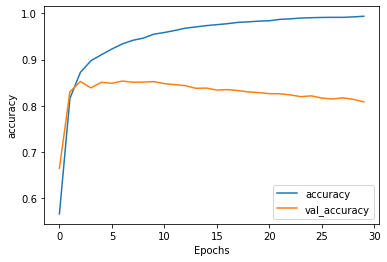

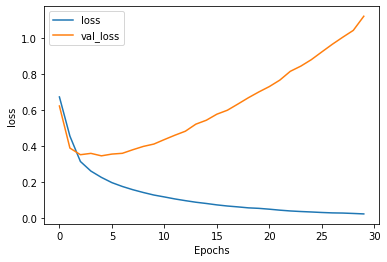

In [33]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, 
                    validation_data = (testing_padded, testing_labels), 
                    verbose=2)

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [34]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [35]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [36]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [37]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [38]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[8.9638263e-01]
 [1.5636708e-05]]


# 앞으로는, IMDB dataset 이 pre-tokenize 된 version 을 보게 될 것이라고 한다. 뭔가 다른 사람이 미리 해준 것을 보는 것이라고 생각하면 된다. 전데 했던 것 처럼. 

sub-word 에서는 flatten 이 안된다고 한다 그래서 global average pooling 이라는 것을 사용한다고 한다. 

sub-word 로 하게 되면 전보다는 더 loss 가 줄어들게 되고 , accuracy 도 높아 지게 된다고 한다. 


In [ ]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)


In [39]:
# Double check TF 2.0x is installed. If you ran the above block, there was a 
# 'reset all runtimes' button at the bottom that you needed to press
import tensorflow as tf
print(tf.__version__)

2.5.0


In [40]:
# If the import fails, run this
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /Users/hhi/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [41]:
train_data, test_data = imdb['train'], imdb['test']

In [42]:
tokenizer = info.features['text'].encoder

In [43]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [44]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [45]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [46]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [47]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [48]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 11s 26ms/step - loss: 0.6708 - accuracy: 0.6280 - val_loss: 0.6104 - val_accuracy: 0.7543
Epoch 2/10
391/391 [==============================] - 10s 26ms/step - loss: 0.4965 - accuracy: 0.8140 - val_loss: 0.4261 - val_accuracy: 0.8414
Epoch 3/10
391/391 [==============================] - 10s 27ms/step - loss: 0.3524 - accuracy: 0.8762 - val_loss: 0.3525 - val_accuracy: 0.8625
Epoch 4/10
391/391 [==============================] - 10s 26ms/step - loss: 0.2867 - accuracy: 0.8972 - val_loss: 0.3220 - val_accuracy: 0.8762
Epoch 5/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2512 - accuracy: 0.9090 - val_loss: 0.3103 - val_accuracy: 0.8803
Epoch 6/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2275 - accuracy: 0.9184 - val_loss: 0.3053 - val_accuracy: 0.8818
Epoch 7/10
391/391 [==============================] - 10s 25ms/step - loss: 0.2067 - accuracy: 0.9264 - val_loss: 0.3122 - val_accuracy:

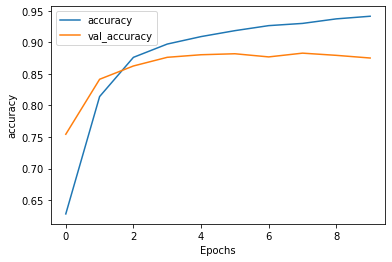

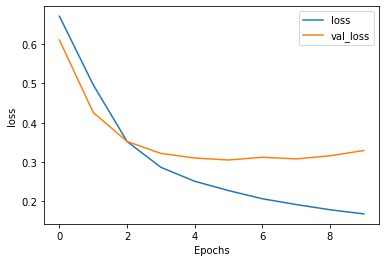

In [49]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [50]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)


- When tokenizing a corpus, what does the num_words=n parameter do?


It specifies the maximum number of words to be tokenized, and picks the most common ‘n’ words

- What is the purpose of the embedding dimension?


It is the number of dimensions for the vector representing the word encoding

- When using IMDB Sub Words dataset, our results in classification were poor. Why?


Sequence becomes much more important when dealing with subwords, but we’re ignoring word positions

